# Highlights
• Arborio, Basmati, Ipsala, Jasmine and Karacadag rice varieties were used.

• The dataset (1) has 75K images including 15K pieces from each rice variety. The dataset (2) has 12 morphological, 4 shape and 90 color features.

• ANN, DNN and CNN models were used to classify rice varieties.

• Classified with an accuracy rate of 100% through the CNN model created.

• The models used achieved successful results in the classification of rice varieties.

# Abstract
Rice, which is among the most widely produced grain products worldwide, has many genetic varieties. These varieties are separated from each other due to some of their features. These are usually features such as texture, shape, and color. With these features that distinguish rice varieties, it is possible to classify and evaluate the quality of seeds. In this study, Arborio, Basmati, Ipsala, Jasmine and Karacadag, which are five different varieties of rice often grown in Turkey, were used. A total of 75,000 grain images, 15,000 from each of these varieties, are included in the dataset. A second dataset with 106 features including 12 morphological, 4 shape and 90 color features obtained from these images was used. Models were created by using Artificial Neural Network (ANN) and Deep Neural Network (DNN) algorithms for the feature dataset and by using the Convolutional Neural Network (CNN) algorithm for the image dataset, and classification processes were performed. Statistical results of sensitivity, specificity, prediction, F1 score, accuracy, false positive rate and false negative rate were calculated using the confusion matrix values of the models and the results of each model were given in tables. Classification successes from the models were achieved as 99.87% for ANN, 99.95% for DNN and 100% for CNN. With the results, it is seen that the models used in the study in the classification of rice varieties can be applied successfully in this field.

In [ ]:
**import warnings
warnings.filterwarnings('ignore')

import pandas as pd 
import numpy as np 
from tqdm.auto import tqdm
import matplotlib.pyplot as plt 
import cv2 
from PIL import Image
import os 
import glob as gb

import torch 
import torch.nn as nn 
import torch.nn.functional as F 
from torch.optim import Adam , lr_scheduler 
import torchvision 
from torchvision import datasets 
import torchvision.transforms as transforms
from torchvision.transforms import ToTensor
from torch.utils.data import DataLoader
from torch.utils.data import Dataset

from sklearn.model_selection import train_test_split 
from sklearn.metrics import accuracy_score , confusion_matrix , recall_score, precision_score , f1_score

In [3]:
def walk_through_data(dir_path) : 
    for dirpath , dirnames , filenames in tqdm(os.walk(dir_path)) : 
        print(f"There are {len(dirnames)} directions and {len(filenames)} images in {dirpath}")

In [4]:
dataset_path='/kaggle/input/rice-image-dataset/Rice_Image_Dataset'

In [5]:
walk_through_data(dataset_path)

0it [00:00, ?it/s]

There are 5 directions and 1 images in /kaggle/input/rice-image-dataset/Rice_Image_Dataset
There are 0 directions and 15000 images in /kaggle/input/rice-image-dataset/Rice_Image_Dataset/Karacadag
There are 0 directions and 15000 images in /kaggle/input/rice-image-dataset/Rice_Image_Dataset/Basmati
There are 0 directions and 15000 images in /kaggle/input/rice-image-dataset/Rice_Image_Dataset/Jasmine
There are 0 directions and 15000 images in /kaggle/input/rice-image-dataset/Rice_Image_Dataset/Arborio
There are 0 directions and 15000 images in /kaggle/input/rice-image-dataset/Rice_Image_Dataset/Ipsala


In [6]:
extension=[]
for folder in tqdm(os.listdir(dataset_path)) : 
    if folder == 'Rice_Citation_Request.txt' : 
        continue
        
    for file in os.listdir(dataset_path + "/" + folder + "/") : 
        if os.path.isfile(dataset_path + "/" + folder + "/" + file) : 
            extension.append(os.path.splitext(file)[1])

  0%|          | 0/6 [00:00<?, ?it/s]

In [7]:
print(len(extension),np.unique(extension))

75000 ['.jpg']


In [8]:
classes=[]
for folder in tqdm(os.listdir(dataset_path)) : 
    if folder == 'Rice_Citation_Request.txt' : 
        continue
        
    if folder not in classes : 
        classes.append(folder)

  0%|          | 0/6 [00:00<?, ?it/s]

In [9]:
classes

['Karacadag', 'Basmati', 'Jasmine', 'Arborio', 'Ipsala']

In [10]:
img_label={key : value for value , key in enumerate(classes)}
img_label 

{'Karacadag': 0, 'Basmati': 1, 'Jasmine': 2, 'Arborio': 3, 'Ipsala': 4}

In [11]:
def getlabel(n) : 
    for x , y in img_label.items() : 
        if y==n : 
            return x 

In [12]:
dataset_path_list=[]
dataset_labels=[]
for folder in tqdm(os.listdir(dataset_path)) : 
    if folder == 'Rice_Citation_Request.txt' : 
        continue
        
    files=gb.glob(pathname= str(dataset_path + "/" + folder + "/*.jpg"))
    for file in files : 
        dataset_path_list.append(file)
        dataset_labels.append(img_label[folder])

  0%|          | 0/6 [00:00<?, ?it/s]

In [13]:
len(dataset_path_list) , len(dataset_labels)

(75000, 75000)

In [14]:
np.unique(dataset_labels)

array([0, 1, 2, 3, 4])

In [15]:
train_path_list , test_path_list , train_labels , test_labels = train_test_split(dataset_path_list , dataset_labels , train_size=0.80 , random_state=0)

In [16]:
print(f"The size of the training set is : {len(train_path_list)}")
print(f"The size of the testing set is : {len(test_path_list)}")

The size of the training set is : 60000
The size of the testing set is : 15000


In [17]:
img_size=224

In [18]:
dataset_images=[]
for folder in tqdm(os.listdir(dataset_path)) : 
    if folder == 'Rice_Citation_Request.txt' : 
        continue
        
    files=gb.glob(pathname= str(dataset_path + "/" + folder + "/*.jpg"))
    for file in files : 
        img=cv2.imread(file)
        img=cv2.resize(img,(img_size,img_size))
        dataset_images.append(list(img))

  0%|          | 0/6 [00:00<?, ?it/s]

In [19]:
print(np.array(dataset_images).shape)

(75000, 224, 224, 3)


In [2]:
# dataset_images.shape

# Observation
The first image dataset consists of 75,000 rice grain images, 
15,000 from each varieties. In RGB images contained in this dataset, the 
size of the image in which each grain of rice is located is 250 × 250 
pixels. Furthermore, there is a second feature dataset with a total of 106 
features, including 12 morphological, 4 shapes and 90 color features 
obtained from each rice grain using these images

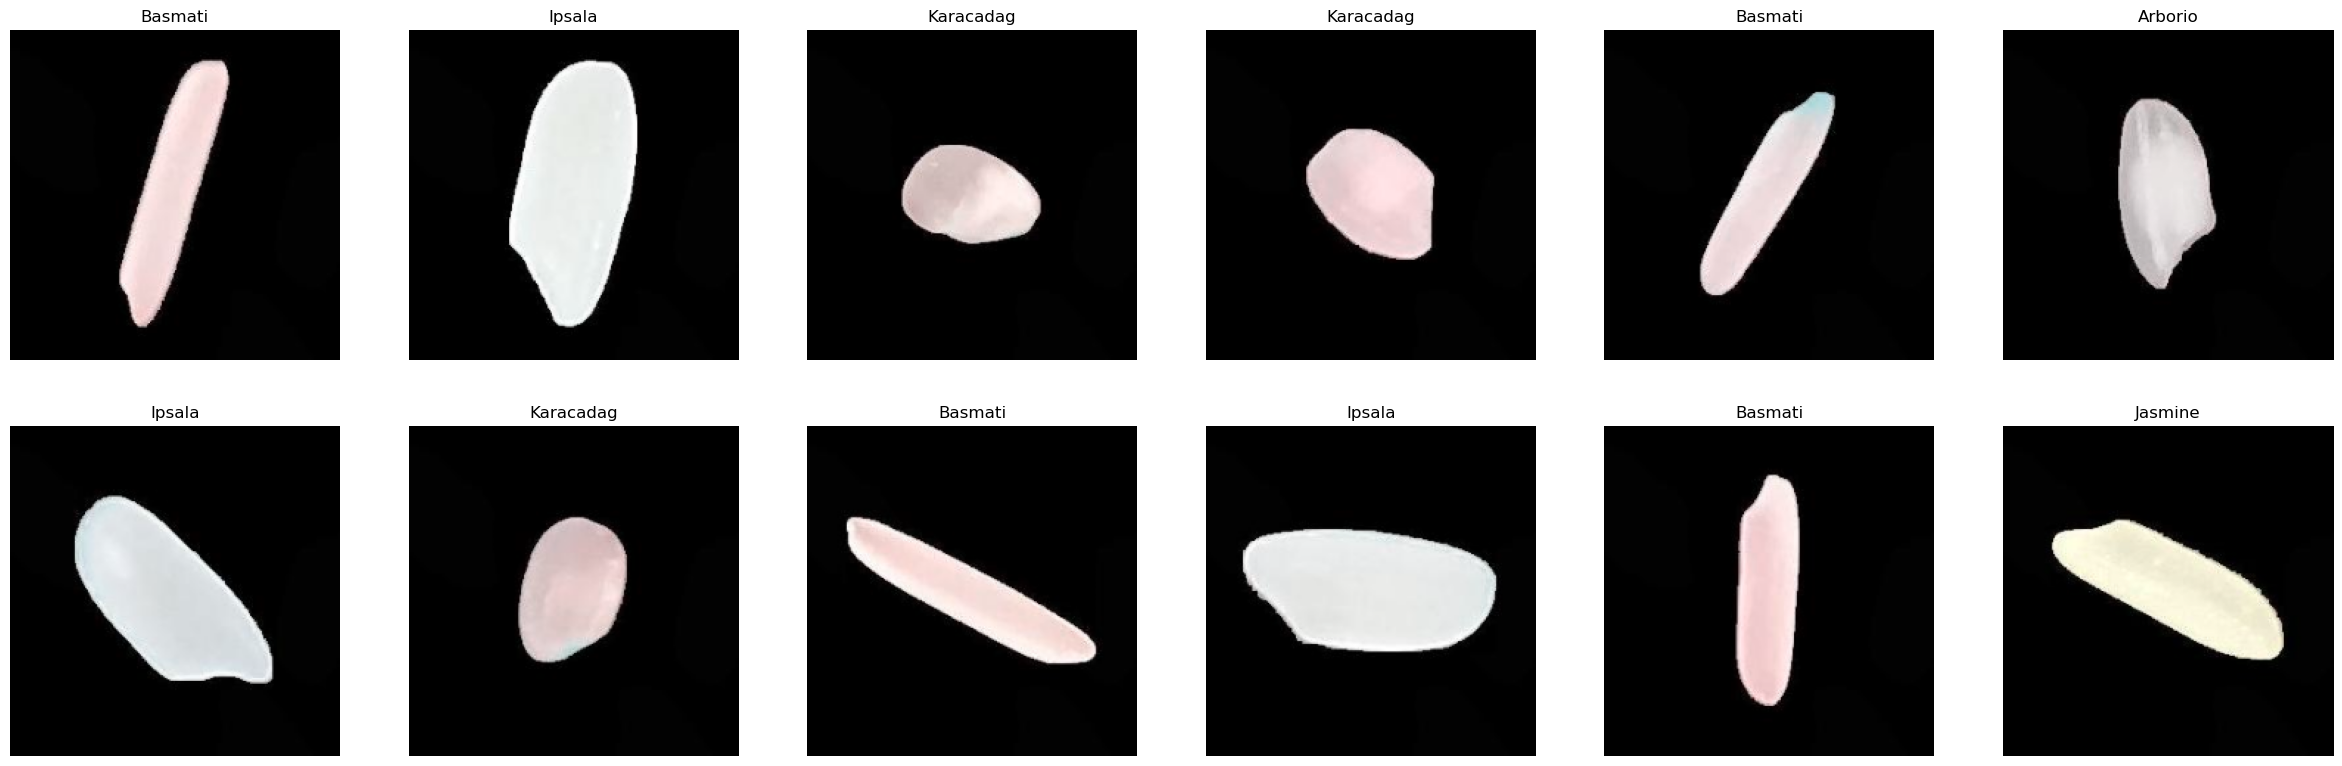

In [20]:
plt.figure(figsize=(30,30))
for n , i in enumerate(list(np.random.randint(0,len(dataset_images),12))):
    plt.subplot(6,6,n+1)
    plt.imshow(dataset_images[i])
    plt.axis('off')
    plt.title(getlabel(dataset_labels[i]))

In [21]:
basic_transform=transforms.Compose([
    transforms.Resize(size=(img_size,img_size)) , 
    transforms.ToTensor()
])

In [22]:
class InvalidDatasetException(Exception):
    
    def __init__(self,len_of_paths,len_of_labels):
        super().__init__(
            f"Number of paths ({len_of_paths}) is not compatible with number of labels ({len_of_labels})"
        )

In [23]:
class train_data(Dataset) : 
    def __init__(self,train_path,train_label,transform_method) : 
        self.train_path=train_path 
        self.train_label = train_label 
        self.transform_method=transform_method 
        if len(self.train_path) != len(self.train_label):
            raise InvalidDatasetException(self.train_path,self.train_label)
            
    
    def __len__(self) : 
        return len(self.train_path) 
    
    
    def __getitem__(self,index) : 
        image = Image.open(self.train_path[index])
        tensor_image = self.transform_method(image)
        label = self.train_label[index]
        
        return tensor_image , label 

In [24]:
train_set = train_data(train_path_list , train_labels , basic_transform) 

In [25]:
np.unique(train_set.train_label)

array([0, 1, 2, 3, 4])

In [26]:
train_set.__len__()

60000

In [27]:
filer_train_image=train_set.__getitem__(1000)

In [28]:
filer_train_image[0].shape

torch.Size([3, 224, 224])

In [29]:
getlabel(filer_train_image[1])

'Basmati'

In [30]:
class test_data(Dataset) : 
    def __init__(self,test_path , test_label , transform_method) : 
        self.test_path = test_path 
        self.test_label = test_label 
        self.transform_method = transform_method 
        if len(self.test_path) != len(self.test_label):
            raise InvalidDatasetException(self.test_path,self.test_label)
            
             
    def __len__(self) : 
        return len(self.test_path) 
    
    
    def __getitem__(self,index) : 
        image=Image.open(self.test_path[index])
        tensor_image = self.transform_method(image)
        label=self.test_label[index]
        
        return tensor_image , label 

In [31]:
test_set = test_data(test_path_list , test_labels , basic_transform)

In [32]:
np.unique(test_set.test_label)

array([0, 1, 2, 3, 4])

In [33]:
test_set.__len__()

15000

In [34]:
filer_test_image = test_set.__getitem__(200)

In [35]:
filer_test_image[0].shape

torch.Size([3, 224, 224])

In [36]:
getlabel(filer_test_image[1])

'Ipsala'

In [37]:
BATCH_SIZE = 128 

In [38]:
torch.manual_seed(42)
train_dataloader = DataLoader(
    dataset=train_set , 
    batch_size = BATCH_SIZE , 
    shuffle = True 
)

In [39]:
torch.manual_seed(42)
test_dataloader = DataLoader(
    dataset=test_set , 
    batch_size = BATCH_SIZE , 
    shuffle = False 
)

In [40]:
print(f"the size of the train dataloader {len(train_dataloader)} batches of {BATCH_SIZE}")

the size of the train dataloader 469 batches of 128


In [41]:
print(f"the size of the test dataloader {len(test_dataloader)} batches of {BATCH_SIZE}")

the size of the test dataloader 118 batches of 128


In [42]:
trainimage_sample , trainlabel_sample = next(iter(train_dataloader)) 
trainimage_sample.shape , trainlabel_sample.shape

(torch.Size([128, 3, 224, 224]), torch.Size([128]))

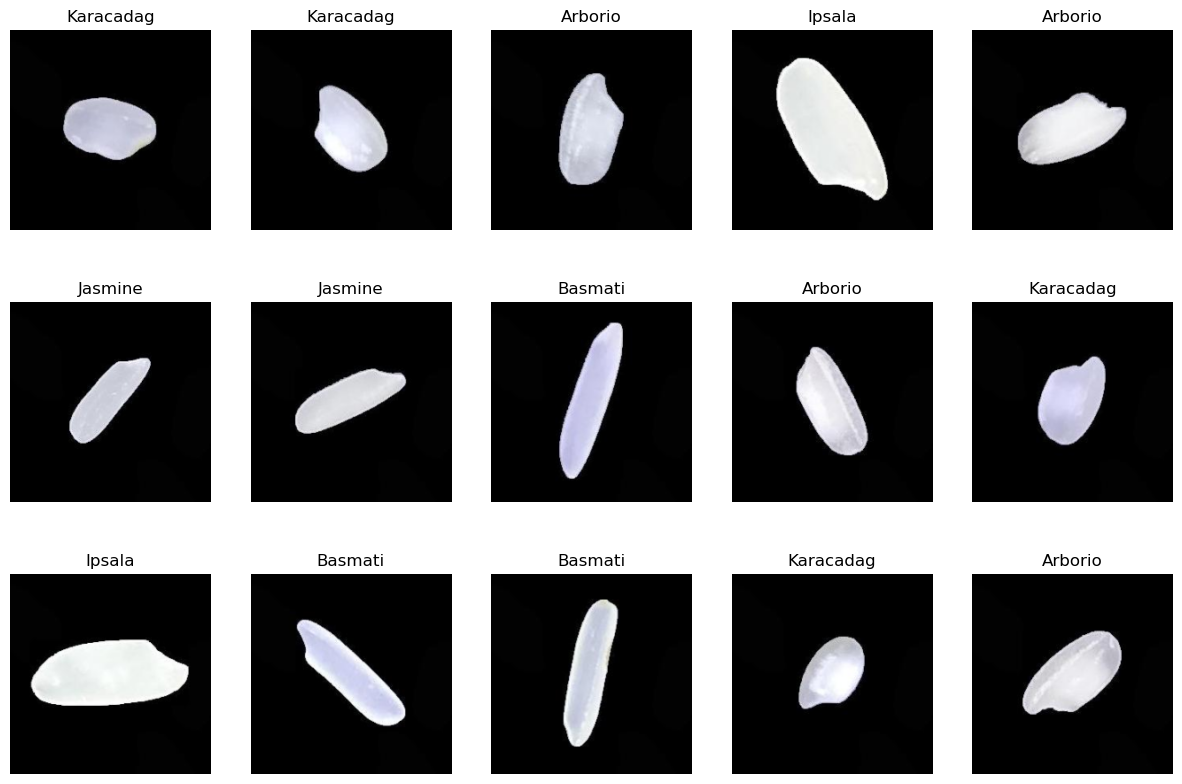

In [43]:
fig, axis = plt.subplots(3, 5, figsize=(15, 10))
for i, ax in enumerate(axis.flat):
    with torch.no_grad():
        img = trainimage_sample[i].numpy()
        img = np.transpose(img, (1, 2, 0))
        ax.imshow(img)
        ax.set(title = f"{getlabel(trainlabel_sample[i])}")
        ax.axis('off')

In [44]:
def param_count(model):
    params = [p.numel() for p in model.parameters() if p.requires_grad]
    print('Total number of parameters : ', sum(params))

In [45]:
class CNN(nn.Module) : 
    def __init__(self,input_shape , output) : 
        super().__init__()
        self.block1=nn.Sequential(
            nn.Conv2d(
                in_channels=input_shape , 
                out_channels=32 , 
                kernel_size=(3,3) , 
                stride=2 , 
                padding = 1 
            ) , 
            
            nn.ReLU() , 
            
            nn.Conv2d(
                in_channels=32 , 
                out_channels=64 , 
                kernel_size=(3,3) , 
                stride=2 , 
                padding=1 
            ) , 
            
            nn.ReLU() , 
            
            nn.MaxPool2d(kernel_size=2)
        )
        
        self.block2=nn.Sequential(
            nn.Conv2d(
                in_channels=64 , 
                out_channels=128 , 
                kernel_size=(3,3) , 
                stride = 2 , 
                padding = 1 
            ) , 
            
            nn.ReLU() , 
            
            nn.Conv2d(
                in_channels=128 , 
                out_channels=256 , 
                kernel_size = (3,3) , 
                stride = 2 , 
                padding = 1 
            ) ,
            
            nn.ReLU() , 
            
            nn.MaxPool2d(kernel_size=2)
        )
        
        self.fully_connected_layer=nn.Sequential(
            nn.Flatten() , 
            nn.Linear(in_features=256*3*3
                      , out_features=output)
        )
        
        
    def forward(self,x) : 
        x=self.block1(x) 
#         print(f"The output shape of conv block1 is : {x.shape}\n\n")
        x=self.block2(x) 
#         print(f"The output shape of conv block2 is : {x.shape}\n\n")
        x=self.fully_connected_layer(x)
#         print(f"The output shape of fully connected layes is : {x.shape}\n\n")
        return x

In [46]:
torch.manual_seed(42)
model=CNN(
    input_shape = 3 , 
    output=len(classes)
)

In [47]:
model.parameters

<bound method Module.parameters of CNN(
  (block1): Sequential(
    (0): Conv2d(3, 32, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1))
    (1): ReLU()
    (2): Conv2d(32, 64, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1))
    (3): ReLU()
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (block2): Sequential(
    (0): Conv2d(64, 128, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1))
    (1): ReLU()
    (2): Conv2d(128, 256, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1))
    (3): ReLU()
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (fully_connected_layer): Sequential(
    (0): Flatten(start_dim=1, end_dim=-1)
    (1): Linear(in_features=2304, out_features=5, bias=True)
  )
)>

In [48]:
param_count(model)

Total number of parameters :  399941


In [49]:
criterion=nn.CrossEntropyLoss()
optimizer=Adam(model.parameters(),lr=0.01)

In [50]:
epochs=5
training_acc=[]
training_loss=[]
for i in tqdm(range(epochs)) : 
    epoch_loss=0
    correct=0
    total=0
    for batch , (x_train , y_train) in enumerate(train_dataloader) : 
        y_pred=model.forward(x_train)
        loss=criterion(y_pred,y_train)
        
        if batch % 50 == 0:
            print(f"Looked at {batch * len(x_train)}/{len(train_dataloader.dataset)} samples.")
            
        loss.backward()
        optimizer.step()
        optimizer.zero_grad()
        
        epoch_loss+=loss
        
        _,pred = torch.max(y_pred,dim=1)
        correct = correct + torch.sum(pred == y_train).item()
        total += y_train.size(0)
        
    training_loss.append((epoch_loss/len(train_dataloader)).detach().numpy())
    training_acc.append(100 * correct / total)
    print(f"Epoch {i}: Accuracy: {100 * correct/total}, Loss: {(epoch_loss/len(train_dataloader))}")

  0%|          | 0/5 [00:00<?, ?it/s]

Looked at 0/60000 samples.
Looked at 6400/60000 samples.
Looked at 12800/60000 samples.
Looked at 19200/60000 samples.
Looked at 25600/60000 samples.
Looked at 32000/60000 samples.
Looked at 38400/60000 samples.
Looked at 44800/60000 samples.
Looked at 51200/60000 samples.
Looked at 57600/60000 samples.
Epoch 0: Accuracy: 89.52666666666667, Loss: 0.28878381848335266
Looked at 0/60000 samples.
Looked at 6400/60000 samples.
Looked at 12800/60000 samples.
Looked at 19200/60000 samples.
Looked at 25600/60000 samples.
Looked at 32000/60000 samples.
Looked at 38400/60000 samples.
Looked at 44800/60000 samples.
Looked at 51200/60000 samples.
Looked at 57600/60000 samples.
Epoch 1: Accuracy: 96.09166666666667, Loss: 0.11589750647544861
Looked at 0/60000 samples.
Looked at 6400/60000 samples.
Looked at 12800/60000 samples.
Looked at 19200/60000 samples.
Looked at 25600/60000 samples.
Looked at 32000/60000 samples.
Looked at 38400/60000 samples.
Looked at 44800/60000 samples.
Looked at 51200/600

In [51]:
print(f"The loss of the training set is : {training_loss[-1]}")
print(f"The accuracy of the training set is : {training_acc[-1]}%")

The loss of the training set is : 0.05717920511960983
The accuracy of the training set is : 98.16166666666666%


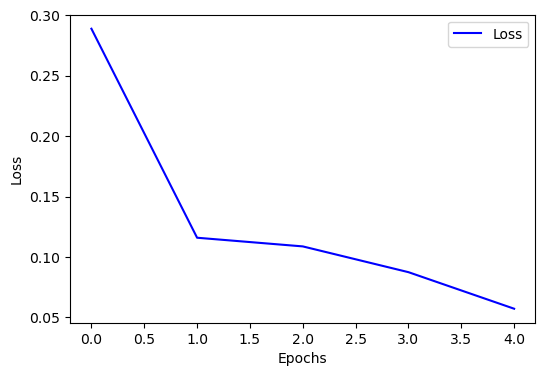

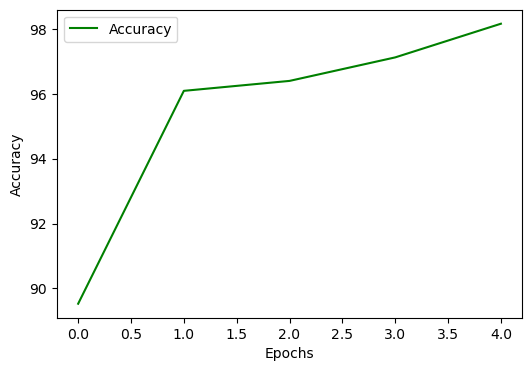

In [52]:
plt.subplots(figsize=(6,4))
plt.plot(range(epochs),training_loss,color="blue",label="Loss")
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

plt.subplots(figsize=(6,4))
plt.plot(range(epochs),training_acc,color="green",label="Accuracy")
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [53]:
test_loss=0
test_acc= 0
torch.manual_seed(42)
with torch.no_grad() : 
        for x_test , y_test in test_dataloader : 
            y_pred=model.forward(x_test)
            loss=criterion(y_pred,y_test)
            test_loss+=loss
            test_acc += accuracy_score(y_test , y_pred.argmax(dim=1))
test_loss/=len(test_dataloader)
test_acc/=len(test_dataloader)

In [54]:
print(f"The loss of the testing set is : {test_loss}\n")
print(f"The accuracy of the testing set is : {test_acc*100}%\n")

The loss of the testing set is : 0.031395021826028824

The accuracy of the testing set is : 98.9208156779661%



In [55]:
y_preds=[]
x_test_samples=[]
y_test_samples=[]
torch.manual_seed(42)
with torch.no_grad() : 
    for x_test , y_test in test_dataloader : 
        x_test_samples.append(x_test)
        y_test_samples.append(y_test.detach().numpy())
        y_pred=model.forward(x_test)
        y_preds.append(y_pred.detach().numpy())

In [56]:
y_preds=np.array(y_preds)
x_test_samples=np.array(x_test_samples)
y_test_samples=np.array(y_test_samples)

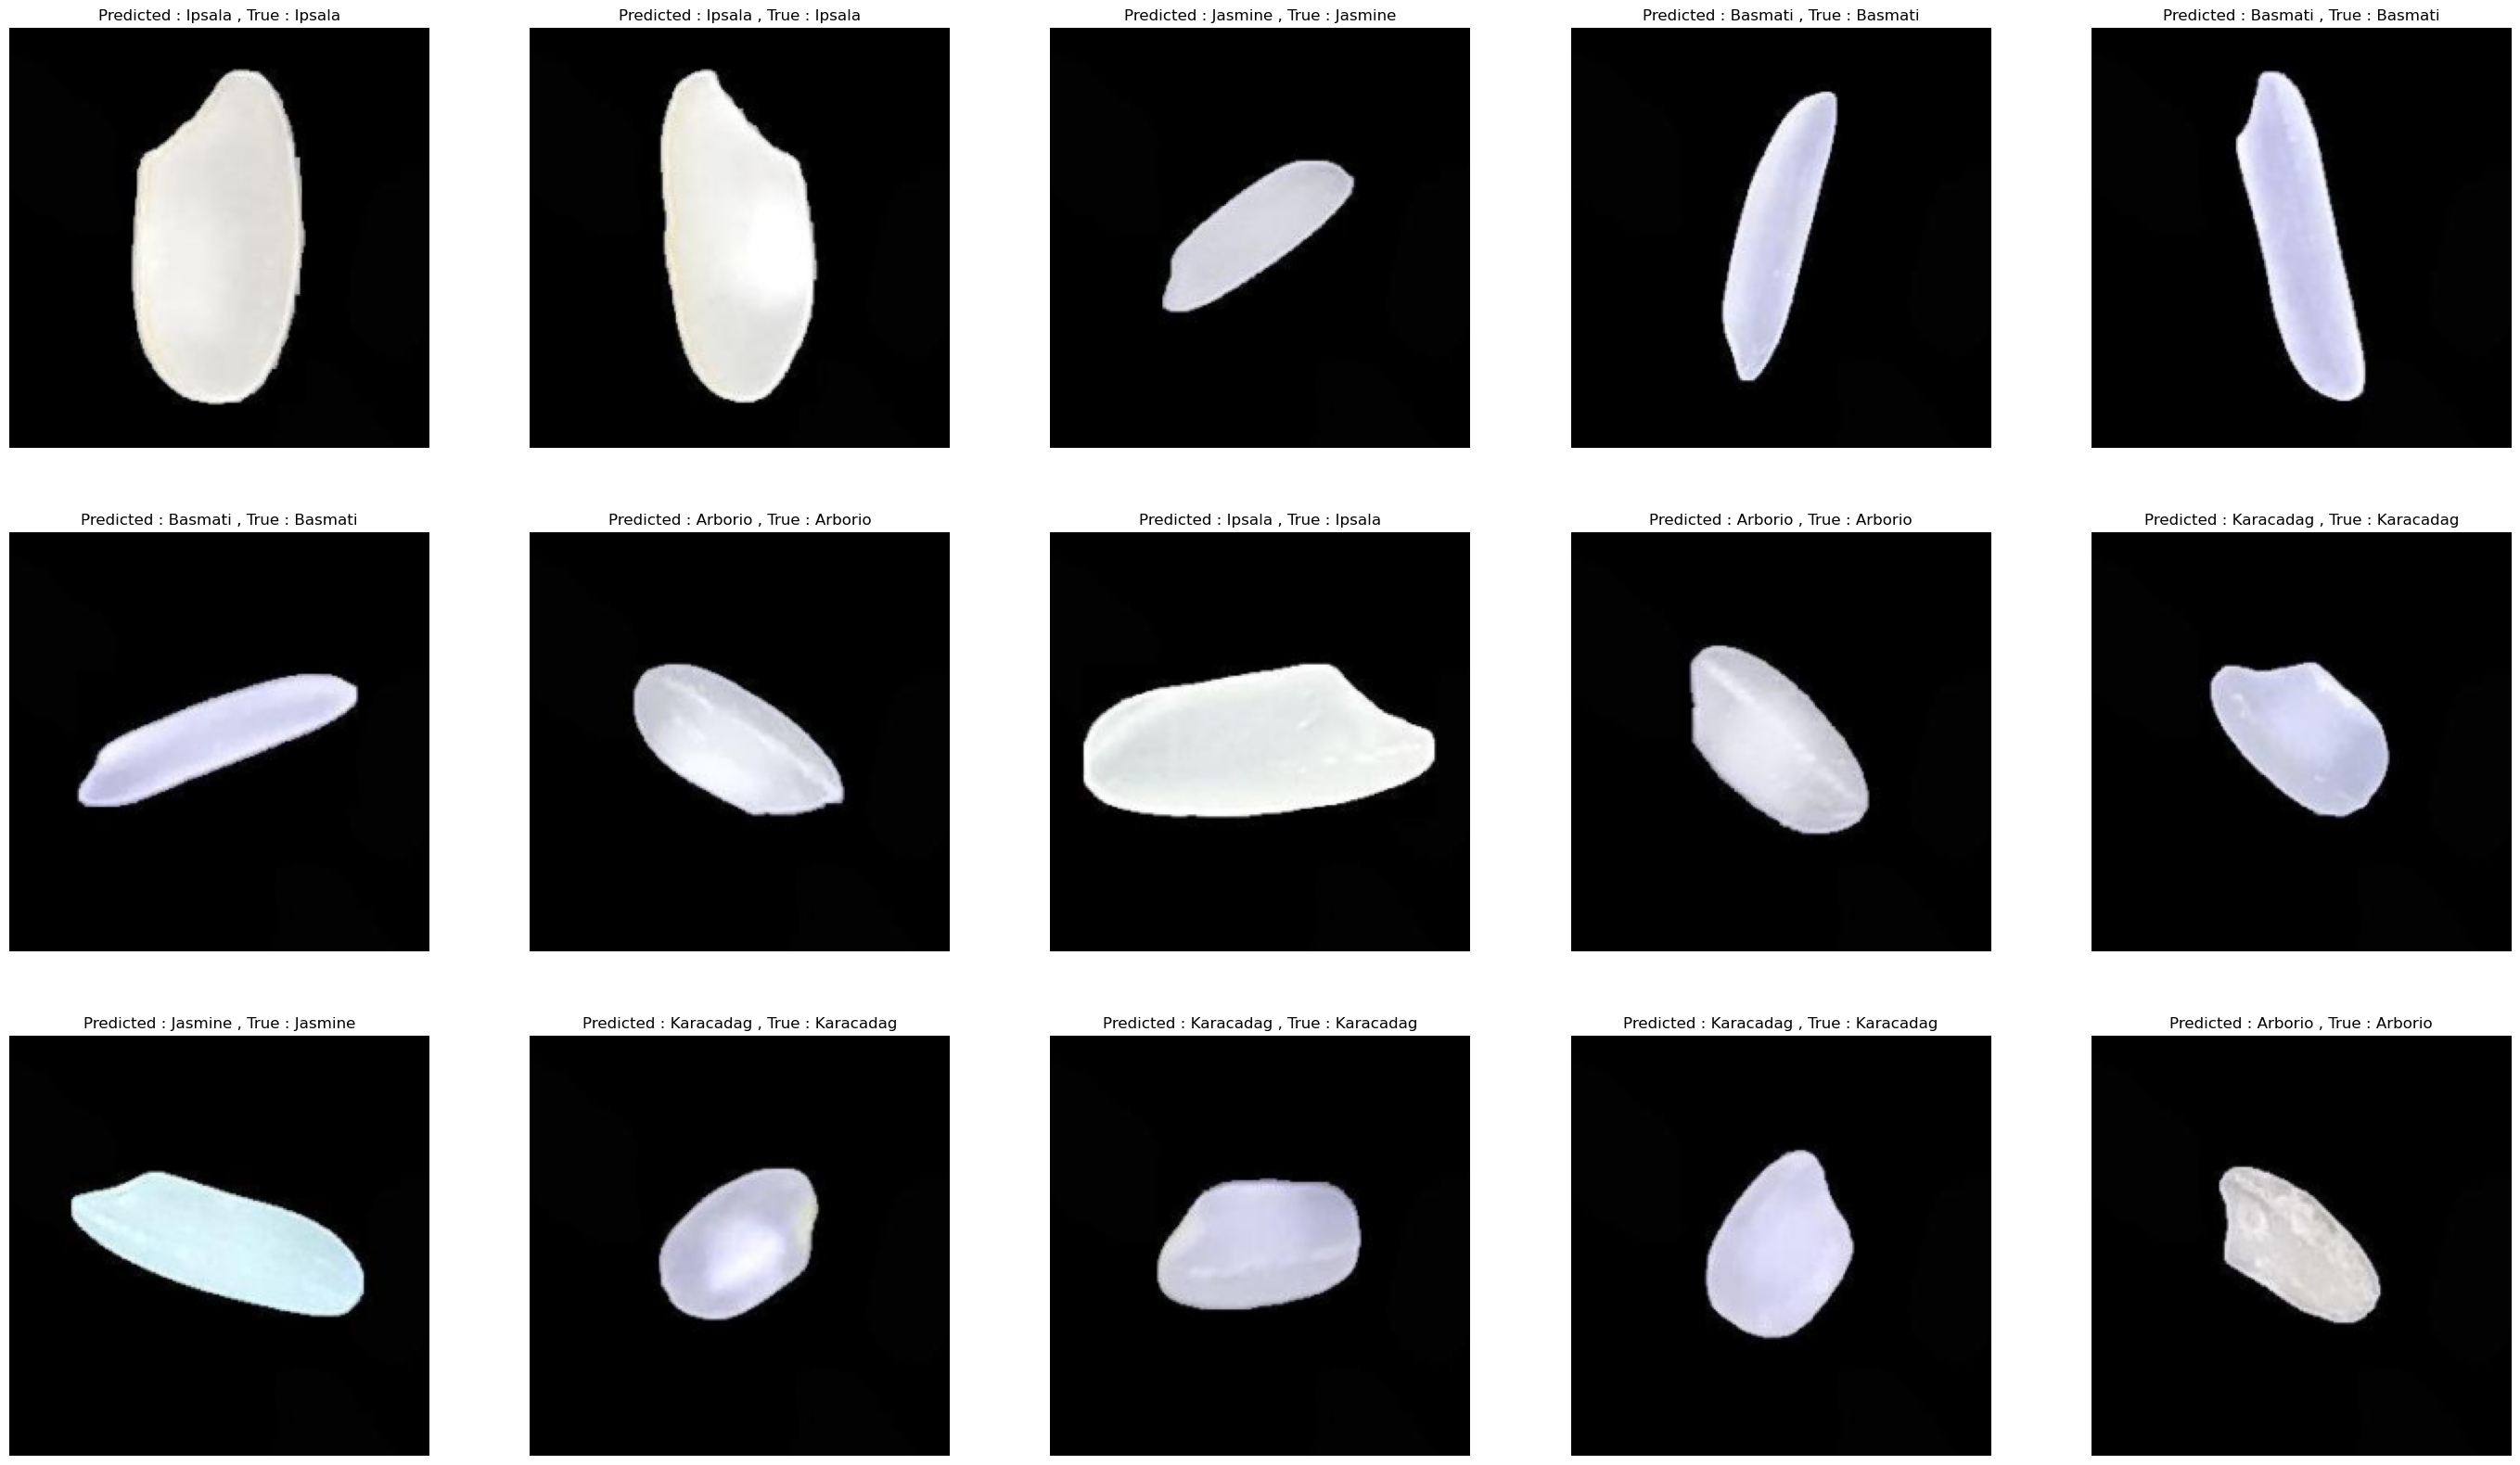

In [57]:
fig, axis = plt.subplots(3, 5, figsize=(35, 20))
for i, ax in enumerate(axis.flat):
    with torch.no_grad():
        img = x_test_samples[0][i].numpy()
        img = np.transpose(img, (1, 2, 0))
        ax.imshow(img)
        ax.set(title = f"Predicted : {getlabel(y_preds[0][i].argmax())} , True : {getlabel(y_test_samples[0][i])}")
        ax.axis('off')